# <font color='blue'>Construindo um classificador Gradient Boosting em Python</font>

In [1]:
# Imports
from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [1]:
# Imports 
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Definidino dados para X e Y
X, y = make_hastie_10_2(n_samples= 5000)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
# Cria o Classificador 
classificador = GradientBoostingClassifier(n_estimators = 200,
                                           max_depth= 3)

In [8]:
# Treina o modelo
classificador.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200)

In [9]:
classificador.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [10]:
# Previsões das classes (labels)
pred = classificador.predict(X_test)

In [12]:
# Score nos dados de teste (Acurácia)
acc = classificador.score(X_test, y_test)
acc

0.9216

In [15]:
# Prevendo as probabilidades 
classificador.predict_proba(X_test)[1]

array([0.4998686, 0.5001314])

In [16]:
y_test[1]

1.0

In [29]:
# VERFICIAR OS ESTIMADORES BASE
classificador.estimators_[0,0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                      random_state=RandomState(MT19937) at 0x1EF635E5740)

<font color='red'>Parâmetros mais importantes:</font>
- Número de árvores de regressão (n_estimators)

- Profundidade de cada árvore (max_depth)

- loss function (loss)

---
# <font color='blue'>Construindo um Regressor Gradient Boosting em Python</font>

Populating the interactive namespace from numpy and matplotlib


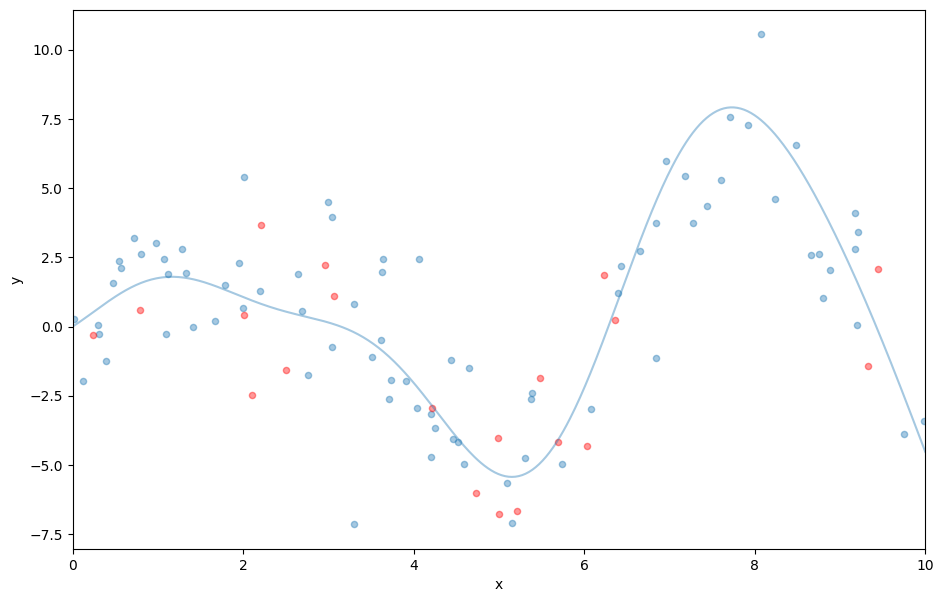

In [30]:
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
%pylab inline

FIGSIZE = (11, 7)

# Aproximação da função (linha de regressão ideal)
def reg_line(x):
    return x * np.sin(x) + np.sin(2 * x)

# Gerando dados de treino e de teste
def gen_data(n_samples = 200):
    
    # Gera a massa de dados aleatórios
    np.random.seed(15)
    X = np.random.uniform(0, 10, size = n_samples)[:, np.newaxis]
    y = reg_line(X.ravel()) + np.random.normal(scale = 2, size = n_samples)
    
    # Divide em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
    
    return X_train, X_test, y_train, y_test

# Construção dos datasets
X_train, X_test, y_train, y_test = gen_data(100)

# Dados para a linha de regressão
x_plot = np.linspace(0, 10, 500)

# Plot dos dados
def plot_data(alpha = 0.4, s = 20):
    
    # Cria a figura
    fig = plt.figure(figsize = FIGSIZE)
    
    # Gera o plot
    gt = plt.plot(x_plot, reg_line(x_plot), alpha = alpha)

    # Plot dos dados de treino e de teste
    plt.scatter(X_train, y_train, s = s, alpha = alpha)
    plt.scatter(X_test, y_test, s = s, alpha = alpha, color = 'red')
    plt.xlim((0, 10))
    plt.ylabel('y')
    plt.xlabel('x')

# Formatação
annotation_kw = {'xycoords': 'data', 'textcoords': 'data', 'arrowprops': {'arrowstyle': '->', 'connectionstyle': 'arc'}}

# Plot
plot_data()
# Azul - Treino
# vermelho - Teste

---
## <font color='red'>Plot de 2 Árvores com diferentes PROFUNDIDADES</font>

In [32]:
from sklearn.tree import DecisionTreeRegressor

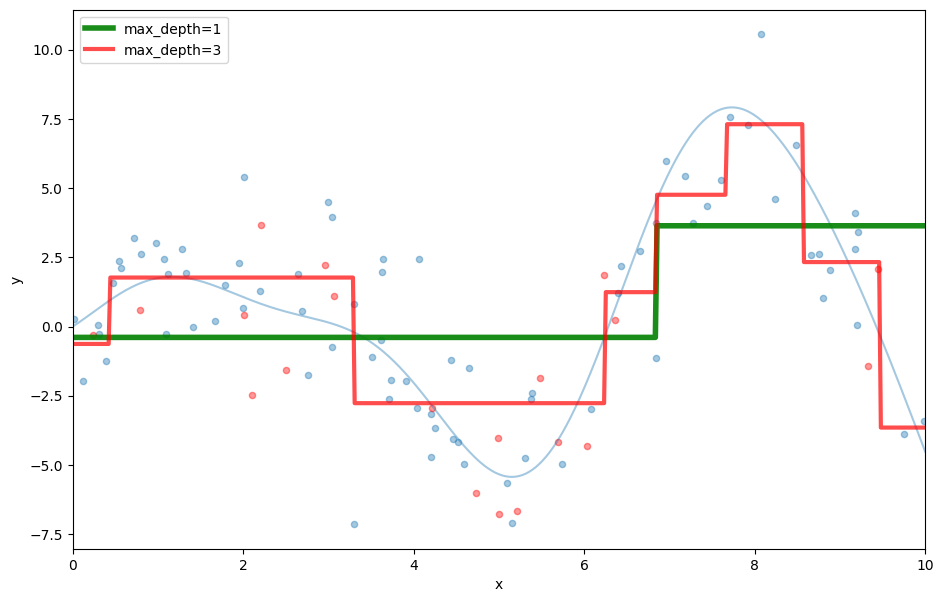

In [41]:
plot_data()

# Árvores de decisão com max deth = 1
est = DecisionTreeRegressor(max_depth=1).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:,np.newaxis]), label = "max_depth=1", color = "g", alpha = 0.9, linewidth = 4)

# Árvores de decisão com max deth = 3
est = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:,np.newaxis]), label = "max_depth=3", color = "r", alpha = 0.7, linewidth = 3)


# Posição das legendas
plt.legend(loc = "upper left")

# Aplicando Gradient Boosting Regressor

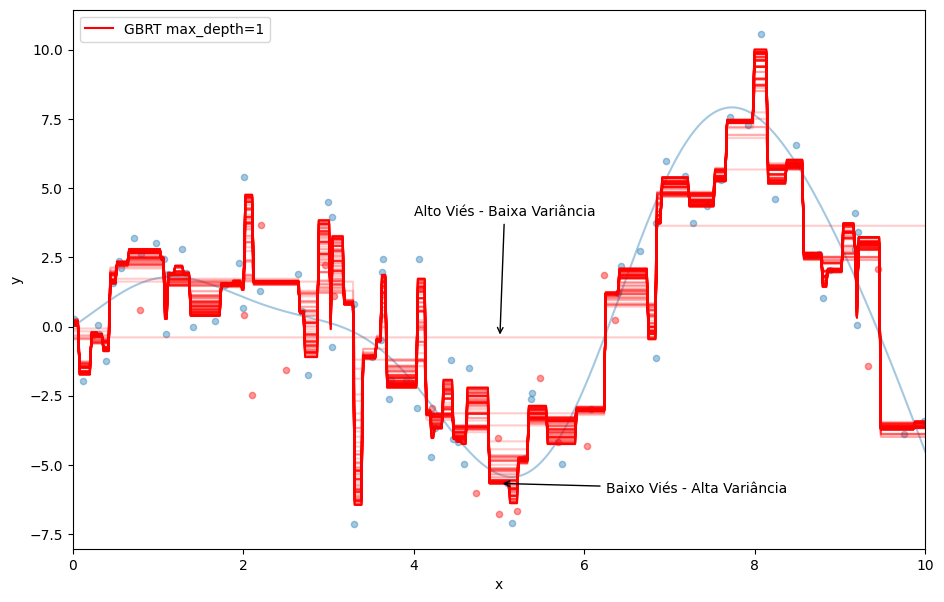

In [49]:
from itertools import islice
from sklearn.ensemble import GradientBoostingRegressor

plot_data()

# Regressor GBRT
est = GradientBoostingRegressor(n_estimators = 1000, max_depth = 1, learning_rate = 1.0)

# Modelo
est.fit(X_train, y_train)
ax = plt.gca()
first = True

# Passos através das previsões à medida que adicionamos mais árvores
for pred in islice(est.staged_predict(x_plot[:, np.newaxis]), 0, est.n_estimators, 10):
    plt.plot(x_plot, pred, color = 'r', alpha = 0.2)
    if first:
        ax.annotate('Alto Viés - Baixa Variância', 
                    xy = (x_plot[x_plot.shape[0] // 2], pred[x_plot.shape[0] // 2]), 
                    xytext = (4, 4), 
                    **annotation_kw)
        first = False

# COM A FUNCÇAO ACIMA, podemos plotar a posição de momento a cada 10 estimadores 

# Previsões
pred = est.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, pred, color = 'r', label = 'GBRT max_depth=1')
ax.annotate('Baixo Viés - Alta Variância', 
            xy = (x_plot[x_plot.shape[0] // 2], pred[x_plot.shape[0] // 2]), 
            xytext = (6.25, -6), 
            **annotation_kw)

# Posição da legenda
plt.legend(loc = 'upper left')

## Diagnosticando se o modelo sofre Overfiting

c:\Users\alyss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


Text(810, 3.5, 'Gap Treino-Teste')

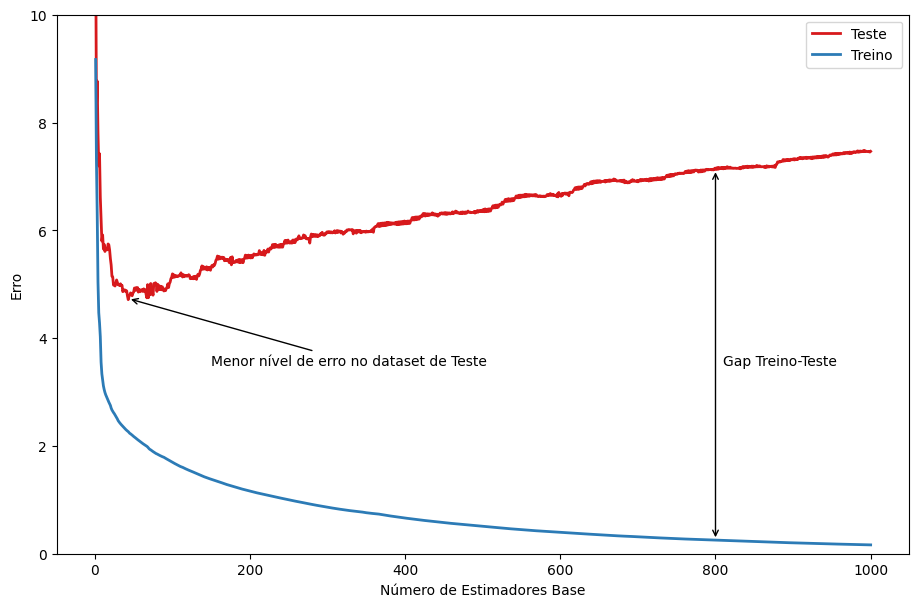

In [50]:
def deviance_plot(est, X_test, y_test, ax=None, label='', train_color='#2c7bb6', test_color='#d7191c', alpha=1.0, ylim = (0, 10)):
    n_estimators = len(est.estimators_)
    test_dev = np.empty(n_estimators)

    for i, pred in enumerate(est.staged_predict(X_test)):
       test_dev[i] = est.loss_(y_test, pred)

    if ax is None:
        fig = plt.figure(figsize = FIGSIZE)
        ax = plt.gca()
        
    ax.plot(np.arange(n_estimators) + 1, test_dev, color = test_color, label = 'Teste %s' % label, linewidth = 2, alpha = alpha)
    ax.plot(np.arange(n_estimators) + 1, est.train_score_, color = train_color, label = 'Treino %s' % label, linewidth = 2, alpha = alpha)
    ax.set_ylabel('Erro')
    ax.set_xlabel('Número de Estimadores Base')
    ax.set_ylim(ylim)
    return test_dev, ax

# Aplica a função aos dados de teste para medir o overfitting do nosso modelo (est)
test_dev, ax = deviance_plot(est, X_test, y_test)
ax.legend(loc = 'upper right')

# Legendas
ax.annotate('Menor nível de erro no dataset de Teste', 
            xy = (test_dev.argmin() + 1, test_dev.min() + 0.02), 
            xytext = (150, 3.5), 
            **annotation_kw)

ann = ax.annotate('', xy = (800, test_dev[799]),  xycoords = 'data',
                  xytext = (800, est.train_score_[799]), textcoords = 'data',
                  arrowprops = {'arrowstyle': '<->'})
ax.text(810, 3.5, 'Gap Treino-Teste')

---
## <font color='red'>Regularização (EVITAR OVERFITING)</font>

1 - Alterar a estrutura da árvore

2 - Shrikage (reduzir a árvore)

3 - Stochastic Gradient Boosting (modifica o gradient boosting)

<font color='green'>Alterando a Estrutura da Árvore</font>

Alterando o parâmetro min_samples_leaf garantimos um número maior de amostras por folha.

c:\Users\alyss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
c:\Users\alyss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


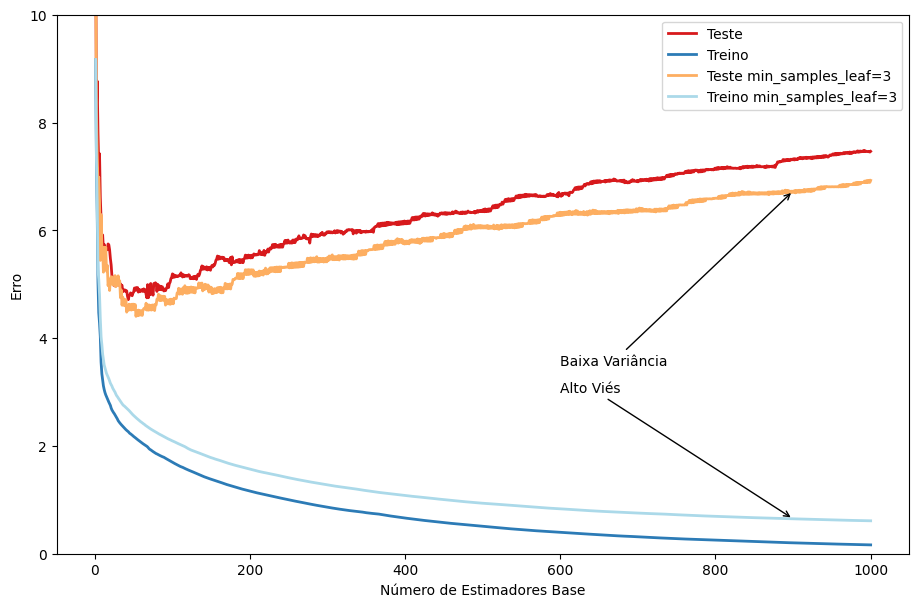

In [59]:
def fmt_params(params):
    return ", ".join("{0}={1}".format(key, val) for key, val in params.items())

fig = plt.figure(figsize = FIGSIZE)
ax = plt.gca()

for params, (test_color, train_color) in [({}, ('#d7191c', '#2c7bb6')), ({'min_samples_leaf': 3}, ('#fdae61', '#abd9e9'))]:
    est = GradientBoostingRegressor(n_estimators = 1000, max_depth = 1, learning_rate = 1.0)
    est.set_params(**params)
    est.fit(X_train, y_train)
    test_dev, ax = deviance_plot(est, 
                                 X_test, 
                                 y_test, 
                                 ax = ax, 
                                 label = fmt_params(params),
                                 train_color = train_color, 
                                 test_color = test_color)
    
ax.annotate('Alto Viés', xy = (900, est.train_score_[899]), xytext= ( 600, 3), **annotation_kw)
ax.annotate('Baixa Variância', xy = (900, test_dev[899]), xytext = (600, 3.5), **annotation_kw)
plt.legend(loc = 'upper right')

<font color='green'>Shrinnkage</font>

Reduz o aprendizado de cada árvore, reduzindo o learning_rate.

c:\Users\alyss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
c:\Users\alyss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


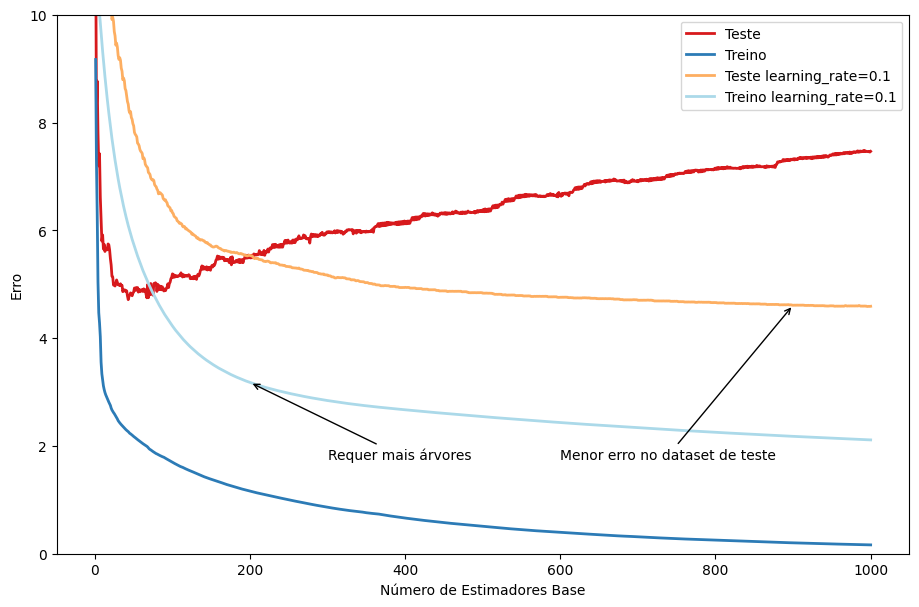

In [60]:
fig = plt.figure(figsize = FIGSIZE)
ax = plt.gca()

for params, (test_color, train_color) in [({}, ('#d7191c', '#2c7bb6')), ({'learning_rate': 0.1}, ('#fdae61', '#abd9e9'))]:
    est = GradientBoostingRegressor(n_estimators = 1000, max_depth = 1, learning_rate = 1.0)
    est.set_params(**params)
    est.fit(X_train, y_train)
    
    test_dev, ax = deviance_plot(est, 
                                 X_test, 
                                 y_test, 
                                 ax = ax, 
                                 label = fmt_params(params),
                                 train_color = train_color, 
                                 test_color = test_color)
    
ax.annotate('Requer mais árvores', xy = (200, est.train_score_[199]), xytext=(300, 1.75), **annotation_kw)
ax.annotate('Menor erro no dataset de teste', xy = (900, test_dev[899]), xytext=(600, 1.75), **annotation_kw)

plt.legend(loc = 'upper right')

<font color='green'>Stochastic Gradient Boosting</font>

Cria subsamples do dataset de treino antes de crescer cada árvore

Cria subsamples dos atributos antes de encontrar o melhor split node (max_features). Funciona melhor se houver grandes volumes de dados.

c:\Users\alyss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
c:\Users\alyss\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


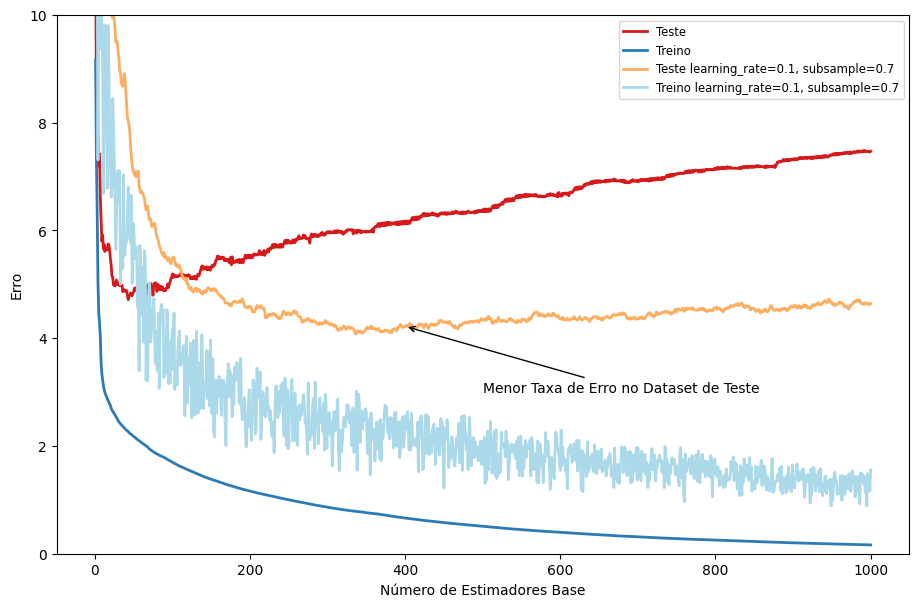

In [61]:
fig = plt.figure(figsize=FIGSIZE)
ax = plt.gca()
for params, (test_color, train_color) in [({}, ('#d7191c', '#2c7bb6')), ({'learning_rate': 0.1, 'subsample': 0.7}, ('#fdae61', '#abd9e9'))]:
    est = GradientBoostingRegressor(n_estimators = 1000, max_depth = 1, learning_rate = 1.0, random_state = 1)
    est.set_params(**params)
    est.fit(X_train, y_train)
    test_dev, ax = deviance_plot(est, 
                                 X_test, 
                                 y_test, 
                                 ax = ax, 
                                 label = fmt_params(params), 
                                 train_color=train_color, 
                                 test_color=test_color)
    
ax.annotate('Menor Taxa de Erro no Dataset de Teste', xy = (400, test_dev[399]), xytext = (500, 3.0), **annotation_kw)

plt.legend(loc = 'upper right', fontsize='small')

<font color='green'>Tunning dos Hiperparâmetros com Grid Search</font>

In [63]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

# Grid de parâmetros
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [4, 5, 6],
              'min_samples_leaf': [3, 4, 5],
              'subsample': [0.5, 0.7],
              'n_estimators': [1000, 2000, 3000]
              }

# Regressor
est = GradientBoostingRegressor()

# Modelo criado com GridSearchCV
gs_cv = GridSearchCV(est, param_grid, scoring = 'neg_mean_squared_error', n_jobs = 4).fit(X_train, y_train)
# neg_mean_squared_error é uma das melhores metricas para Grid Search
# n_jobs = 4 siginifica que abrirei 4 treds no processador

# Imprime os melhors parâmetros
print('Melhores Hiperparâmetros: %r' % gs_cv.best_params_)

Melhores Hiperparâmetros: {'learning_rate': 0.001, 'max_depth': 6, 'min_samples_leaf': 3, 'n_estimators': 3000, 'subsample': 0.5}


## Recria o Modelo com os Melhores Parâmetros

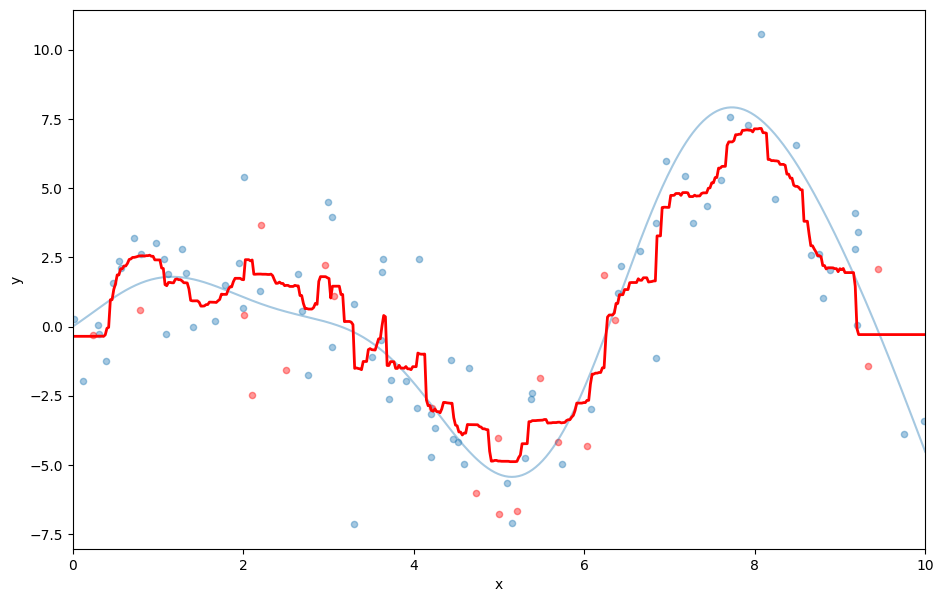

In [64]:
est.set_params(**gs_cv.best_params_)
est.fit(X_train, y_train)

# Plot
plot_data()
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color = 'r', linewidth = 2)